In [83]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Prashant Singh\OneDrive\Documents\Internships\CodSoft\IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Get basic information about the DataFrame
print(df.info())
print(df.describe())

# Display column headers
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


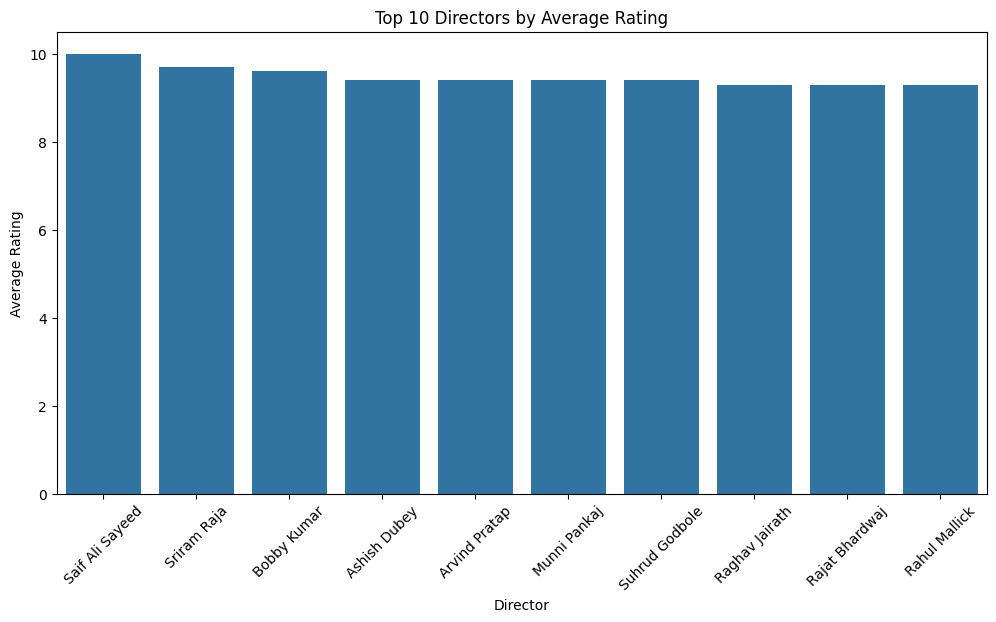

In [85]:
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by Average Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()


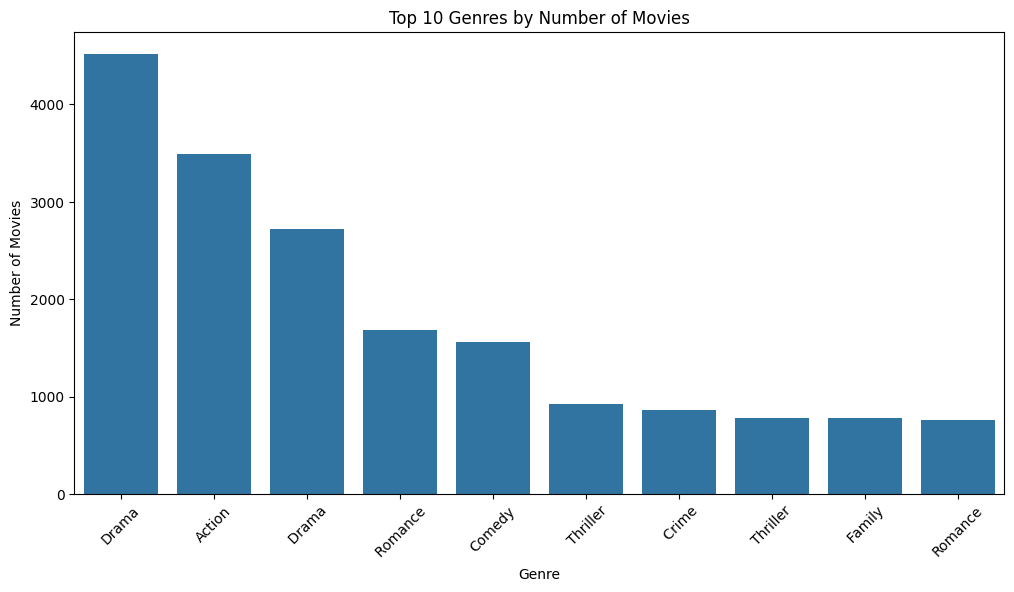

In [86]:
# Count the number of movies per genre
genre_counts = df['Genre'].str.split(',').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title('Top 10 Genres by Number of Movies')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()


In [87]:
# Define features and target variable
X = df[['Year', 'Duration', 'Votes']]  # You can add other relevant features
y = df['Rating']

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

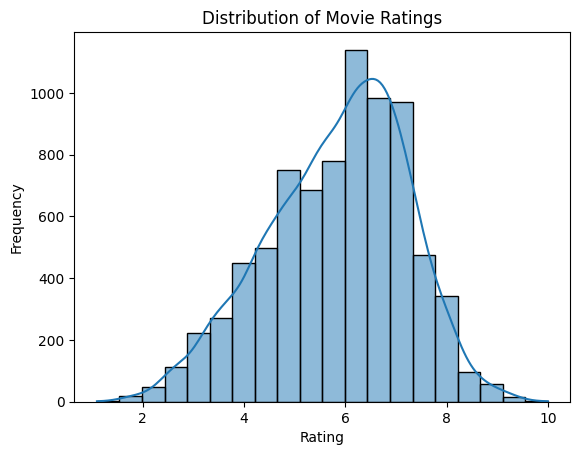

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [89]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load the Dataset
file_path = "C:\\Users\\Prashant Singh\\OneDrive\\Documents\\Internships\\CodSoft\\IMDb Movies India.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 3: Data Exploration
print(data.head())
print(data.info())
print(data.describe())

# Visualizing the distribution of ratings
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Step 4: Preprocessing
# Handling missing values (if any)
data.dropna(subset=['Rating'], inplace=True)  # Drop rows where Rating is missing

# Converting 'Year' and 'Duration' to numeric types if they're not already
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Step 5: Feature Engineering
# Selecting features
X = data[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

# One-Hot Encoding for categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Selection using Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'  # Leave the numeric columns unchanged
    )),
    ('model', RandomForestRegressor(random_state=42))
])

# Step 8: Model Training
pipeline.fit(X_train, y_train)

# Step 9: Model Evaluation
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([1, 10], [1, 10], '--r')  # Diagonal line
plt.show()


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Load the Dataset
file_path = "C:\\Users\\Prashant Singh\\OneDrive\\Documents\\Internships\\CodSoft\\IMDb Movies India.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 3: Data Exploration
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualizing the distribution of ratings
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Step 4: Preprocessing
# Handle missing values: check how many ratings are missing
initial_shape = data.shape
print(f"Initial shape of data: {initial_shape}")

# Drop rows with missing 'Rating'
data.dropna(subset=['Rating'], inplace=True)
print(f"Shape after dropping missing ratings: {data.shape}")

# Impute missing values for 'Year' and 'Duration'
imputer = SimpleImputer(strategy='most_frequent')
data[['Year', 'Duration']] = imputer.fit_transform(data[['Year', 'Duration']])

# Convert 'Year' and 'Duration' to numeric types if they aren't already
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Check for NaN values after conversion
missing_after_conversion = data.isnull().sum()
print("Missing values after conversion:\n", missing_after_conversion)

# Drop any remaining NaN values
data.dropna(inplace=True)
print(f"Remaining samples after preprocessing: {data.shape[0]}")

# Verify shapes before feature selection
print(f"Shape of data before feature selection: {data.shape}")

# Step 5: Feature Engineering
# Selecting features
X = data[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

# Check shapes of features and target
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# One-Hot Encoding for categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Step 6: Train-Test Split
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Features or target variable is empty. Please check the preprocessing steps.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 7: Model Selection using Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'  # Leave numeric columns unchanged
    )),
    ('model', RandomForestRegressor(random_state=42))
])

# Step 8: Model Training
pipeline.fit(X_train, y_train)

# Step 9: Model Evaluation
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([1, 10], [1, 10], '--r')  # Diagonal line
plt.show()
